# Exploration des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import glob
%matplotlib inline

os.chdir("../Données")

In [7]:
# Chargement du fichier 
with np.load('XMM_LSS_v11_uijk_0177_spec_UD.npz') as data:
    print("Fichiers contenus:", data.files)
    
    # Afficher le contenu
    for key in data.files:
        array_data = data[key]
        print(f"\n{key}:")
        print(f"   Shape: {array_data.shape}")
        print(f"   Type: {array_data.dtype}")

Fichiers contenus: ['cube', 'info', 'flag']

cube:
   Shape: (13, 64, 64, 9)
   Type: float32

info:
   Shape: (13,)
   Type: [('ID', '<i8'), ('RA', '<f8'), ('DEC', '<f8'), ('TRACT', '<i8'), ('PATCH', 'S3'), ('MASK', '<i2'), ('FLAG_FIELD', '<i2'), ('EB_V', '<f8'), ('CLASS_STAR_HSC_I', '<f4'), ('u', '<f8'), ('uS', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('y', '<f8'), ('J', '<f8'), ('H', '<f8'), ('Ks', '<f8'), ('u_err', '<f8'), ('uS_err', '<f8'), ('g_err', '<f8'), ('r_err', '<f8'), ('i_err', '<f8'), ('z_err', '<f8'), ('y_err', '<f8'), ('J_err', '<f8'), ('H_err', '<f8'), ('Ks_err', '<f8'), ('ZPHOT', '<f8'), ('OBJ_TYPE', '<f8'), ('COMPACT', '<i8'), ('STAR_FORMING', '<i8'), ('ST_TRAIL', '<i8'), ('CLEAN', 'i1'), ('EBV', '<f8'), ('LABEL', '<i8'), ('SURVEY', 'S6'), ('RA_zs', '<f8'), ('DEC_zs', '<f8'), ('ZSPEC', '<f8'), ('ZFLAG', '<i2'), ('CLASS', 'S6')]

flag:
   Shape: (13, 9)
   Type: int64


In [8]:
# Exploration des infos
with np.load('XMM_LSS_v11_uijk_0177_spec_UD.npz') as data:
    print("Exploration détaillée du tableau 'info':")
    print("=" * 50)
    
    info_data = data['info']
    
    # Afficher les noms des champs
    print("Champs disponibles:", info_data.dtype.names)
    print(f"\nNombre d'objets: {len(info_data)}")
    
    # Afficher le 1 premier objet à titre d'exemple
    print("\nExemple du 1er premier objet :")
    print(f"\nObjet 1 :")
    for champs in info_data.dtype.names:  
        valeur = info_data[1][champs]
        print(f"  {champs}: {valeur}")

Exploration détaillée du tableau 'info':
Champs disponibles: ('ID', 'RA', 'DEC', 'TRACT', 'PATCH', 'MASK', 'FLAG_FIELD', 'EB_V', 'CLASS_STAR_HSC_I', 'u', 'uS', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'Ks', 'u_err', 'uS_err', 'g_err', 'r_err', 'i_err', 'z_err', 'y_err', 'J_err', 'H_err', 'Ks_err', 'ZPHOT', 'OBJ_TYPE', 'COMPACT', 'STAR_FORMING', 'ST_TRAIL', 'CLEAN', 'EBV', 'LABEL', 'SURVEY', 'RA_zs', 'DEC_zs', 'ZSPEC', 'ZFLAG', 'CLASS')

Nombre d'objets: 13

Exemple du 1er premier objet :

Objet 1 :
  ID: 2587242
  RA: 35.0857163243832
  DEC: -4.3871007551983
  TRACT: 8524
  PATCH: b'7,8'
  MASK: 0
  FLAG_FIELD: 93
  EB_V: 0.019265361683211094
  CLASS_STAR_HSC_I: 0.24942363798618317
  u: -99.092
  uS: 21.846
  g: 20.211
  r: 18.978
  i: 18.49
  z: 18.274
  y: 18.076
  J: 17.911
  H: 17.636
  Ks: 17.423
  u_err: 1.086
  uS_err: 0.002
  g_err: 0.001
  r_err: 0.0
  i_err: 0.0
  z_err: 0.0
  y_err: 0.001
  J_err: 0.0
  H_err: 0.0
  Ks_err: 0.0
  ZPHOT: 0.19930000603199005
  OBJ_TYPE: 0.0
  COMPAC

Les données qui nous intéressent sont :
- les magnitudes (u, uS, g, r, i, z, y, J et H)
- le ZPHOT (estimation du redshift)
- le ZSPECT (redshift spectroscopique mesuré)
- le ZFLAG (qualité de l'image)
- l'EBV (?)

In [11]:
# Exploration du cube
with np.load('XMM_LSS_v11_uijk_0177_spec_UD.npz') as data:
    cube_data = data['cube']
    flag_data = data['flag']
    
    print("Exploration du cube:")
    print(f"Dimensions: {cube_data.shape}")
    print(f"Nombre d'objets: {cube_data.shape[0]}")
    print(f"Taille spatiale: {cube_data.shape[1]}x{cube_data.shape[2]}")
    print(f"Nombre de bandes: {cube_data.shape[3]}")
    
    print(f"\nExploration des flags:")
    print(f"Dimensions: {flag_data.shape}")
    print(f"Type: {flag_data.dtype}")

Exploration du cube:
Dimensions: (13, 64, 64, 9)
Nombre d'objets: 13
Taille spatiale: 64x64
Nombre de bandes: 9

Exploration des flags:
Dimensions: (13, 9)
Type: int64


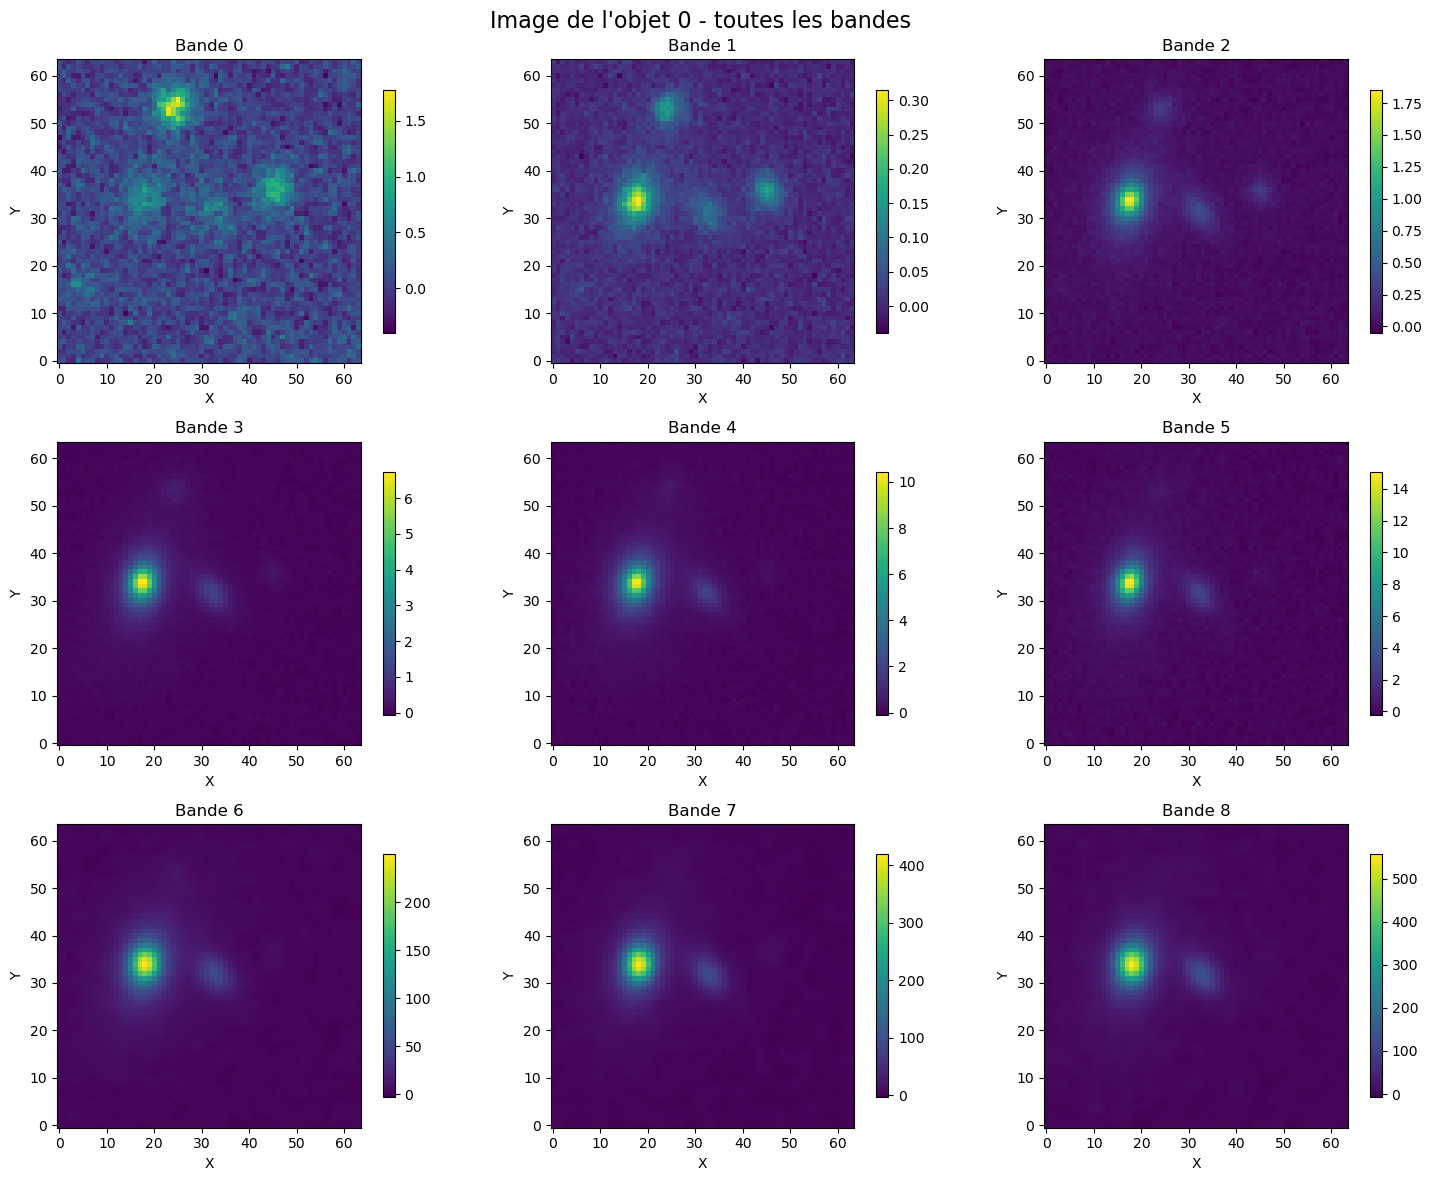

In [14]:
# Visualisation d'un objet du cube
with np.load('XMM_LSS_v11_uijk_0177_spec_UD.npz') as data:
    cube_data = data['cube']
    
    # Visualiser le premier objet
    obj_idx = 0  # Premier objet
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.ravel()
    
    for band in range(min(9, cube_data.shape[3])):  # Pour chaque bande
        img = cube_data[obj_idx, :, :, band]
        
        axes[band].imshow(img, cmap='viridis', origin='lower')
        axes[band].set_title(f'Bande {band}')
        axes[band].set_xlabel('X')
        axes[band].set_ylabel('Y')
        
        # Ajouter une colorbar
        plt.colorbar(axes[band].images[0], ax=axes[band], shrink=0.8)
    
    # Cacher les axes vides s'il y a moins de 9 bandes
    for i in range(cube_data.shape[3], 9):
        axes[i].set_visible(False)
    
    plt.suptitle(f'Image de l\'objet {obj_idx} - toutes les bandes', fontsize=16)
    plt.tight_layout()
    plt.show()

L'objet qui nous interesse est celui du milieu.

In [ ]:
# Statistiques par bande
with np.load('XMM_LSS_v11_uijk_0177_spec_UD.npz') as data:
    cube_data = data['cube']
    
    print(" Statistiques par bande pour tous les objets:")
    print("=" * 40)
    
    for band in range(cube_data.shape[3]):
        band_data = cube_data[:, :, :, band]
        print(f"\nBande {band}:")
        print(f"  Moyenne: {np.mean(band_data):.3f}")
        print(f"  Écart-type: {np.std(band_data):.3f}")
        print(f"  Min: {np.min(band_data):.3f}")
        print(f"  Max: {np.max(band_data):.3f}")
        print(f"  Médiane: {np.median(band_data):.3f}")

 Statistiques par bande pour tous les objets:

Bande 0:
  Moyenne: 0.319
  Écart-type: 1.024
  Min: -0.567
  Max: 19.358
  Médiane: 0.097

Bande 1:
  Moyenne: 0.052
  Écart-type: 0.220
  Min: -0.040
  Max: 6.479
  Médiane: 0.011

Bande 2:
  Moyenne: 0.135
  Écart-type: 0.699
  Min: -0.091
  Max: 24.387
  Médiane: 0.021

Bande 3:
  Moyenne: 0.224
  Écart-type: 1.145
  Min: -0.243
  Max: 36.743
  Médiane: 0.037

Bande 4:
  Moyenne: 0.287
  Écart-type: 1.456
  Min: -0.167
  Max: 48.044
  Médiane: 0.044

Bande 5:
  Moyenne: 0.339
  Écart-type: 1.778
  Min: -0.387
  Max: 57.607
  Médiane: 0.073

Bande 6:
  Moyenne: 6.810
  Écart-type: 34.019
  Min: -3.195
  Max: 878.207
  Médiane: 0.856

Bande 7:
  Moyenne: 8.624
  Écart-type: 46.213
  Min: -5.002
  Max: 1237.848
  Médiane: 1.122

Bande 8:
  Moyenne: 10.852
  Écart-type: 57.275
  Min: -7.666
  Max: 1425.058
  Médiane: 1.635


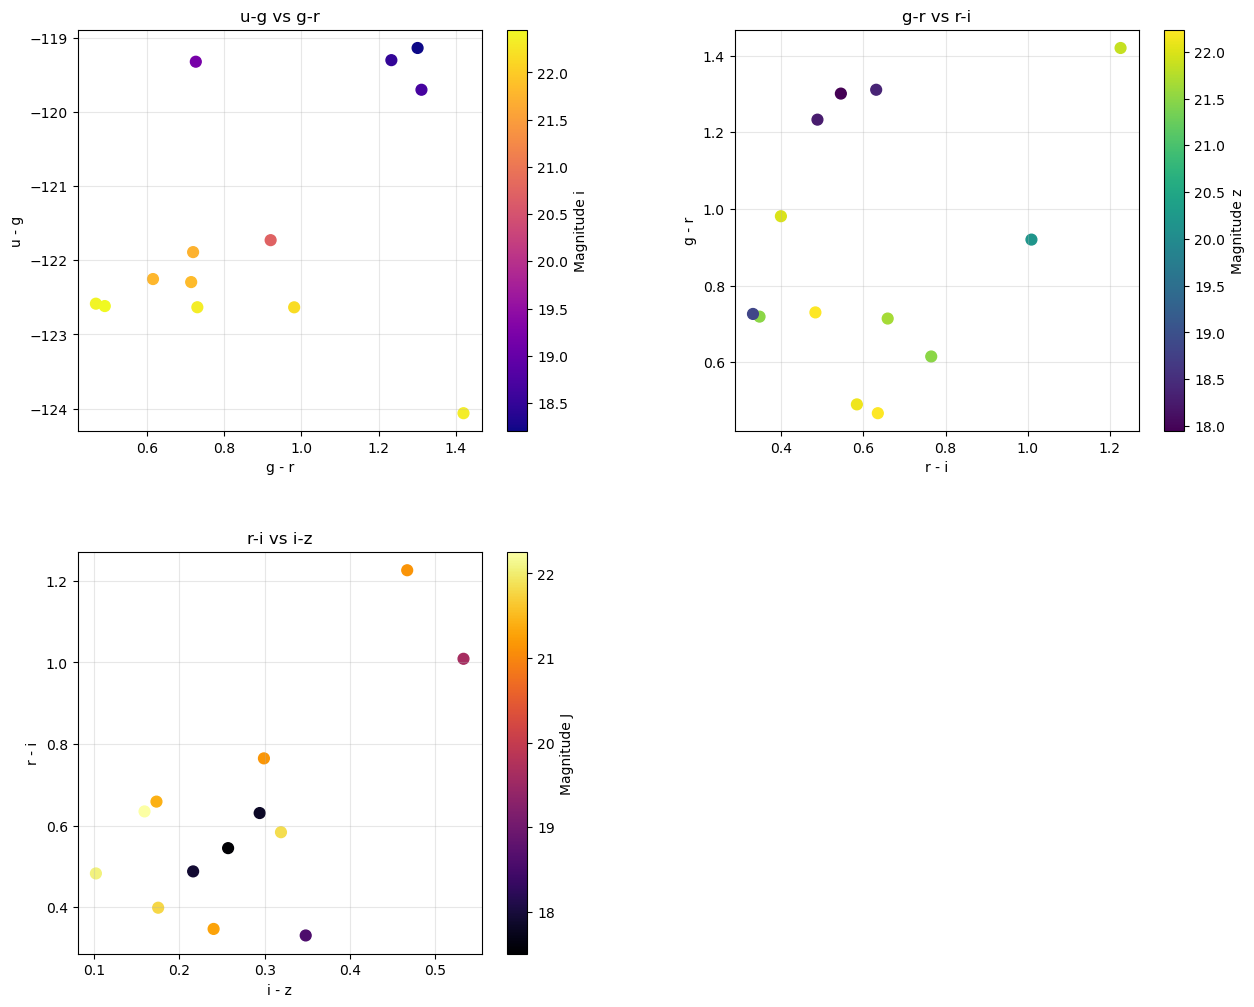

In [ ]:
# Diagramme de Hertzsprung-Russel : couleur-couleur
with np.load('XMM_LSS_v11_uijk_0177_spec_UD.npz') as data:
    info_data = data['info']
    
    u_mag = info_data['u']
    g_mag = info_data['g']
    r_mag = info_data['r']
    i_mag = info_data['i']
    z_mag = info_data['z']
    y_mag = info_data['y']
    J_mag = info_data['J']
    H_mag = info_data['H']
    
    u_g = u_mag - g_mag
    g_r = g_mag - r_mag
    r_i = r_mag - i_mag
    i_z = i_mag - z_mag
    z_y = z_mag - y_mag
    J_H = J_mag - H_mag

fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Diagramme 1 (en haut à gauche)
ax1 = fig.add_subplot(gs[0, 0])
sc1 = ax1.scatter(g_r, u_g, c=i_mag, cmap='plasma', s=60)
ax1.set_xlabel('g - r')
ax1.set_ylabel('u - g')
ax1.set_title('u-g vs g-r')
ax1.grid(True, alpha=0.3)
plt.colorbar(sc1, ax=ax1, label='Magnitude i')

# Diagramme 3 (en bas à gauche)
ax3 = fig.add_subplot(gs[1, 0])
sc3 = ax3.scatter(i_z, r_i, c=J_mag, cmap='inferno', s=60)
ax3.set_xlabel('i - z')
ax3.set_ylabel('r - i')
ax3.set_title('r-i vs i-z')
ax3.grid(True, alpha=0.3)
plt.colorbar(sc3, ax=ax3, label='Magnitude J')

# Diagramme 2 (en haut à droite)
ax2 = fig.add_subplot(gs[0, 1])
sc2 = ax2.scatter(r_i, g_r, c=z_mag, cmap='viridis', s=60)
ax2.set_xlabel('r - i')
ax2.set_ylabel('g - r')
ax2.set_title('g-r vs r-i')
ax2.grid(True, alpha=0.3)
plt.colorbar(sc2, ax=ax2, label='Magnitude z')

# Case vide en bas à droite
ax_empty = fig.add_subplot(gs[1, 1])
ax_empty.axis('off')  # On cache les axes pour cette case

plt.show()


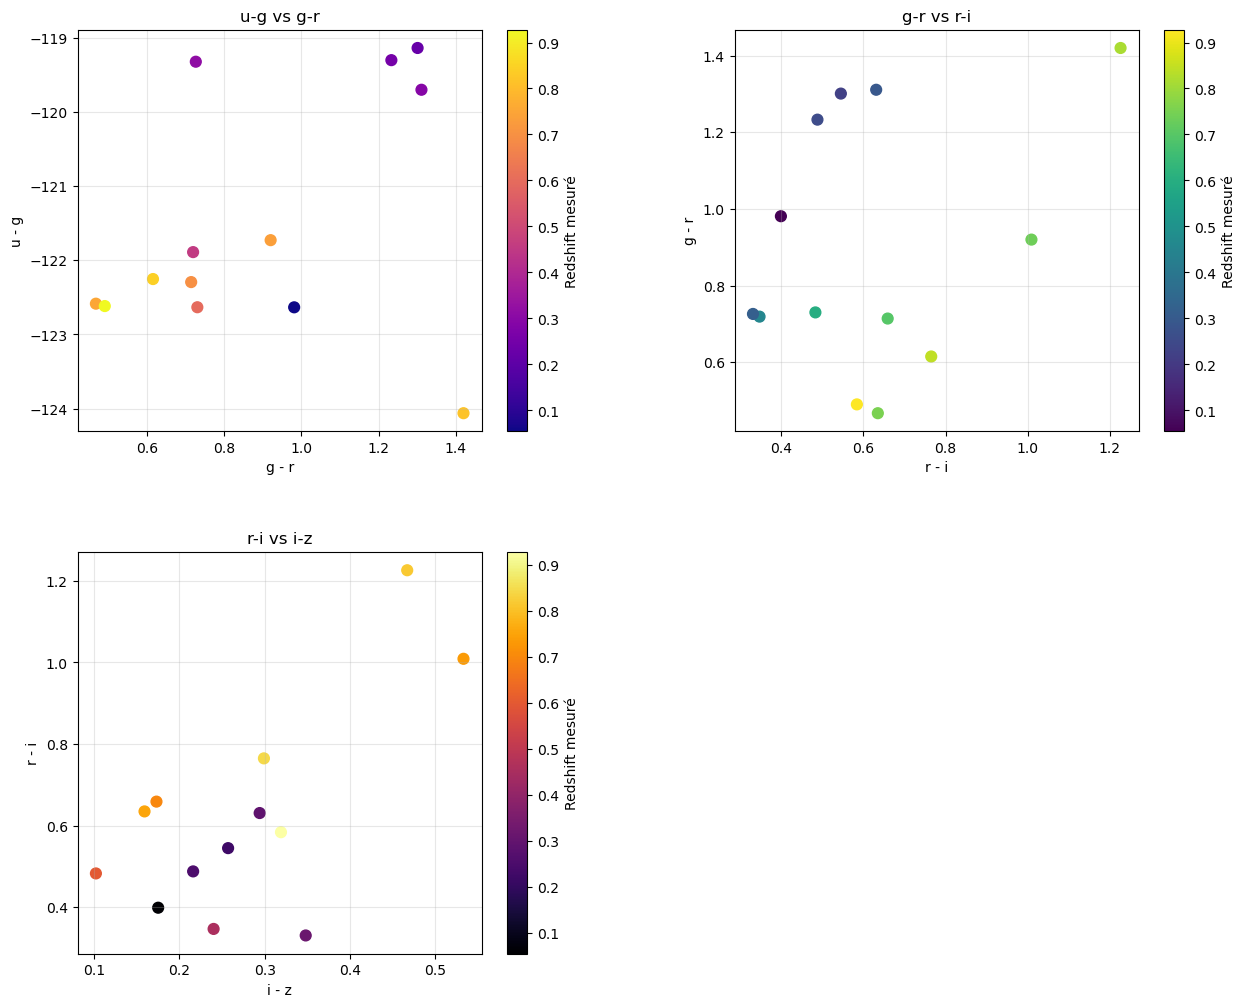

In [39]:
# Diagramme de Hertzsprung-Russel : couleur-redshift
with np.load('XMM_LSS_v11_uijk_0177_spec_UD.npz') as data:
    info_data = data['info']
    
    u_mag = info_data['u']
    g_mag = info_data['g']
    r_mag = info_data['r']
    i_mag = info_data['i']
    z_mag = info_data['z']
    y_mag = info_data['y']
    J_mag = info_data['J']
    H_mag = info_data['H']
    ZSPEC = info_data['ZSPEC']
    
    u_g = u_mag - g_mag
    g_r = g_mag - r_mag
    r_i = r_mag - i_mag
    i_z = i_mag - z_mag
    z_y = z_mag - y_mag

fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Diagramme 1 (en haut à gauche)
ax1 = fig.add_subplot(gs[0, 0])
sc1 = ax1.scatter(g_r, u_g, c=ZSPEC, cmap='plasma', s=60)
ax1.set_xlabel('g - r')
ax1.set_ylabel('u - g')
ax1.set_title('u-g vs g-r')
ax1.grid(True, alpha=0.3)
plt.colorbar(sc1, ax=ax1, label='Redshift mesuré')

# Diagramme 3 (en bas à gauche)
ax3 = fig.add_subplot(gs[1, 0])
sc3 = ax3.scatter(i_z, r_i, c=ZSPEC, cmap='inferno', s=60)
ax3.set_xlabel('i - z')
ax3.set_ylabel('r - i')
ax3.set_title('r-i vs i-z')
ax3.grid(True, alpha=0.3)
plt.colorbar(sc3, ax=ax3, label='Redshift mesuré')

# Diagramme 2 (en haut à droite)
ax2 = fig.add_subplot(gs[0, 1])
sc2 = ax2.scatter(r_i, g_r, c=ZSPEC, cmap='viridis', s=60)
ax2.set_xlabel('r - i')
ax2.set_ylabel('g - r')
ax2.set_title('g-r vs r-i')
ax2.grid(True, alpha=0.3)
plt.colorbar(sc2, ax=ax2, label='Redshift mesuré')

# Case vide en bas à droite
ax_empty = fig.add_subplot(gs[1, 1])
ax_empty.axis('off')  # On cache les axes pour cette case

plt.show()